# From Primordial Soup to Active Inference
<span style="float:right; font-size:0.9em;">March 2022</span>

<span style="font-size:0.9em; font-style:italic;">
#active-inference #markov-blankets
</span>
</br></br>

>This notebook contains a few wandering thoughts on boundaries, surprise, and the stubborn persistence of life. Inspired by the papers in Adamatsky's Handbook of Unconventional Computing.

**How do we get from primordial soup to active inference?**  

It’s one thing for molecules to form, maybe even to clump together. But it’s another for those clumps to begin sensing and acting in ways that seem, strangely, intentional. I don’t mean intentional in a conscious sense—just that they start doing things that seem *about* something: avoiding heat, chasing nutrients, keeping themselves intact. That’s already weird.

I’ve been turning this over in my mind while reading Hesp et al.'s paper, *"A Multi-scale View of the Emergent Complexity of Life"* (2019). One line jumped out:

> “Any view on biological self-organization must explain how organisms remain alive—that is, resist systematic dispersion and entropic decay.”

---

## Chemical Boundaries and the Birth of Agency  
So, what would it even *take* for a pile of molecules to start behaving like it *wants* something?

I keep coming back to the idea of **Markov blankets**. They define a boundary between internal and external states. Inside, a system maintains coherence; outside, the world continues in its chaotic indifference. The interface—what connects the two—is made up of sensory and active states.

What's intriguing is that **Markov blankets emerge spontaneously** under the right energetic and chemical conditions. That means you don’t have to *build* a boundary—it might *self-assemble*, as long as there's a persistent flow of energy and a tendency toward structural coupling.

This gives us a kind of proto-agency: a chemical system that maintains itself by interacting with its environment in ways that limit disruption. That already feels like the shadow of cognition.

---

## Proto-Inference (tropism)
As things get more complex, we start to see behaviors that look like choices. Take bacterial thermotaxis. A bacterium can sense a temperature gradient and move toward a preferred range. That’s not just reaction—it’s action.  

Hesp et al. describe this using the framework of **active inference**:

> “Tropism in bacteria is an example of how organisms do not just passively predict their sensory states but act on their environment to realize their own expectations.”

They’re not saying the bacterium is thinking about temperature. But it *acts as if* it has a prior belief about where it wants to be—and moves to make that belief true. That’s fascinating.  

So maybe the leap from prebiotic chemistry to biological agency isn’t as far as it seems. If structures with boundaries and energy gradients can form spontaneously, and if those structures can act in ways that reduce uncertainty about their environment...  
> Are we already partway to active inference?

---

## The Loop: Model → Action → Sensation → Update  
One of the more elegant things about active inference is how it closes the loop between inside and outside:

> “Organisms have implicit beliefs about the outer world… Yet, they never have direct access to the outer world—only to what impinges upon their sensory receptors.”

So the organism generates predictions (about light, temperature, pressure…), acts to fulfill them, then adjusts its internal models based on how reality replies. That’s how it survives.

The engine behind this is **variational free energy** (VFE), which is the mismatch between what the system *expects* to sense and what it *actually* senses. The lower the mismatch, the better the system is doing at staying within familiar, survivable territory. We use this concept in autotelic AI systems a lot.

> “If biological organisms did not minimize VFE efficiently, the disorder or entropy of their sensory states would not be sufficiently bounded and would diverge, leading to disintegration and death.”

So its like life is a **process of staying coherent in a world that’s always trying to pull you apart**.

And if Markov blankets can spontaneously emerge, **what constraints stabilize them**? I think we can model this with primordial soup....or perhaps someone already has?

---

## Active Inference and Variational Free Energy

Imagine an agent in a 1D world that varies in temperature from left (cold) to right (hot). The agent prefers a specific temperature range, say .05. It can move left or right and gets noisy sensory input about the local temperature.

- `world`: a 1D array representing temperature values
- `agent.blief`: expected preference temperature
- `agent.sensory_input`: noisy temperature readings
- `agent.action`: the action taken by the agent (move left or right)
- `vfe`: variational free energy, calculated as the squared difference between expected and actual temperature

Our world is a 1D temperature gradient from 0.0 to 1.0.
Agent starts at location 1 with preferred temperature 0.5.
Learning rate: 1.0, Sensory noise std: 0.05


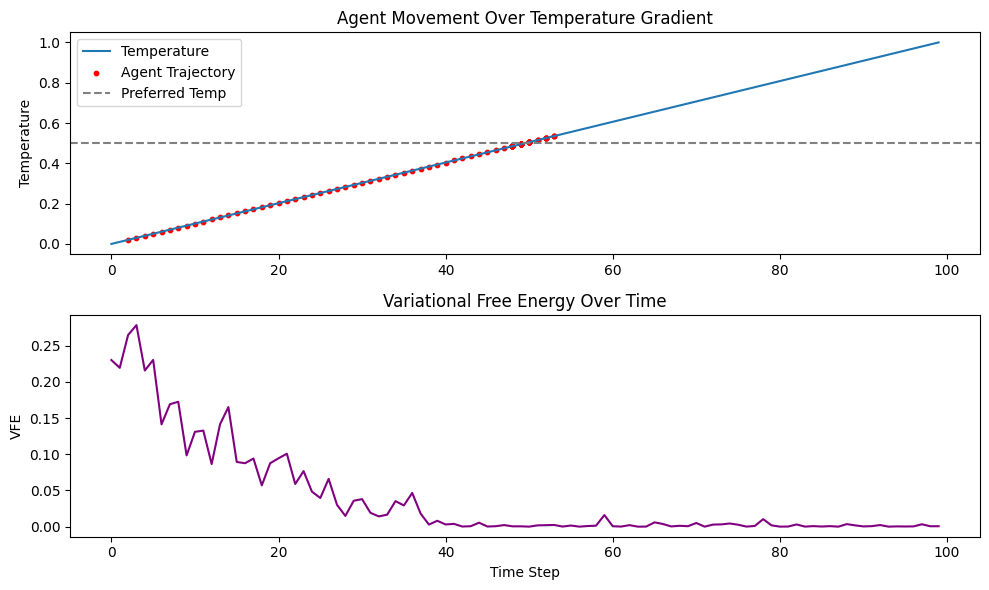

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# build a world
world_size = 100
temperature_gradient = np.linspace(0, 1, world_size)
print(f"Our world is a 1D temperature gradient from {temperature_gradient[0]} to {temperature_gradient[-1]}.")

# Agent parameters
preferred_temp = 0.5            # Prior belief (internal model)
location = np.random.randint(0, world_size)
learning_rate = 1.0             # How strongly the agent moves to minimize VFE
noise_std = 0.05                # Sensory noise
print(f"Agent starts at location {location} with preferred temperature {preferred_temp}.")
print(f"Learning rate: {learning_rate}, Sensory noise std: {noise_std}")


# Simulation
trajectory = []
free_energy = []
steps = 100
for _ in range(steps):
    # Sense environment (with noise)
    sensed_temp = temperature_gradient[location] + np.random.normal(0, noise_std)

    # Compute VFE = (sensed - expected)^2 (simplified)
    vfe = (sensed_temp - preferred_temp) ** 2

    # Decide action: move left if too hot, right if too cold
    action = -1 if sensed_temp > preferred_temp else 1

    # Move in the chosen direction, clipped to stay in bounds
    location = np.clip(location + int(learning_rate * action), 0, world_size - 1)

    # Log data
    trajectory.append(location)
    free_energy.append(vfe)

# Plotting the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Agent trajectory overlaid on temperature gradient
ax1.plot(temperature_gradient, label='Temperature')
ax1.scatter(trajectory, [temperature_gradient[i] for i in trajectory], 
            c='red', s=10, label='Agent Trajectory')
ax1.axhline(preferred_temp, color='gray', linestyle='--', label='Preferred Temp')
ax1.set_title('Agent Movement Over Temperature Gradient')
ax1.set_ylabel('Temperature')
ax1.legend()

# Variational Free Energy over time
ax2.plot(free_energy, color='purple')
ax2.set_title('Variational Free Energy Over Time')
ax2.set_ylabel('VFE')
ax2.set_xlabel('Time Step')

plt.tight_layout()
plt.show()

Great, and so the agent moves toward preferred temperature (a "prior"), overshoots it a little (discrete steps, noisy data), and then comes back. And what it's using as its learning parameter is variational free energy, or surprise--which it tried to minimize. This measure is enough for to create, for the agent to exhibit a goal or preference. A very simple mechanism for the agent to exhibit a goal or preference.

The mere act of minimizing sensory surprise relative to a prior can give rise to the appearance of desire, intention, and control.

If we increase the learning rate, we'd expect the agnet to overshoot :) Lower and it will move more slowly to convergence.

Our world is a 1D temperature gradient from 0.0 to 1.0.
Agent starts at location 77 with preferred temperature 0.5.
Learning rate: 5.0, Sensory noise std: 0.05


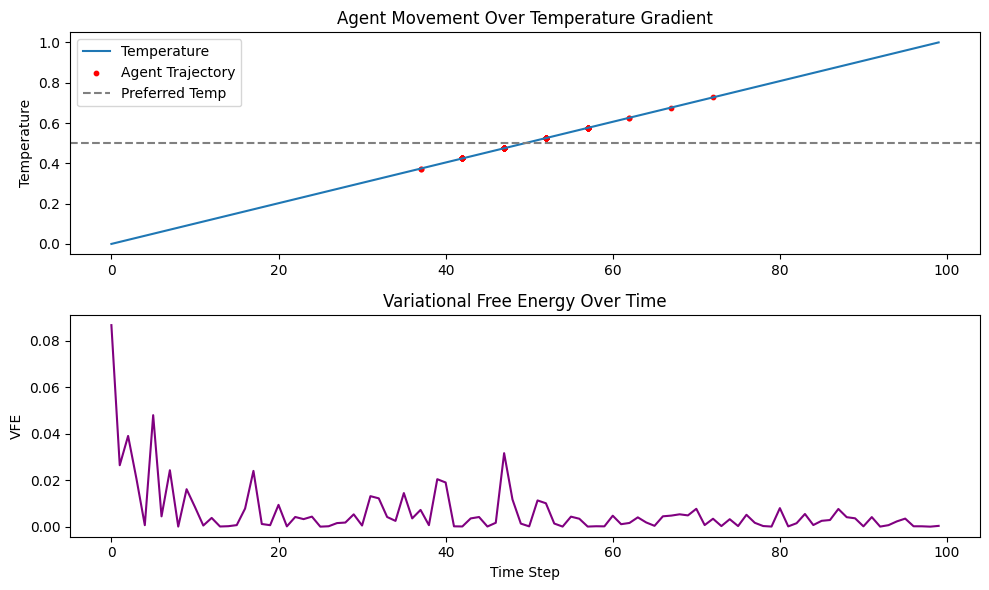

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# build a world
world_size = 100
temperature_gradient = np.linspace(0, 1, world_size)
print(f"Our world is a 1D temperature gradient from {temperature_gradient[0]} to {temperature_gradient[-1]}.")

# Agent parameters
preferred_temp = 0.5            # Prior belief (internal model)
location = np.random.randint(0, world_size)
learning_rate = 5.0             # How strongly the agent moves to minimize VFE
noise_std = 0.05                # Sensory noise
print(f"Agent starts at location {location} with preferred temperature {preferred_temp}.")
print(f"Learning rate: {learning_rate}, Sensory noise std: {noise_std}")


# Simulation
trajectory = []
free_energy = []
steps = 100
for _ in range(steps):
    # Sense environment (with noise)
    sensed_temp = temperature_gradient[location] + np.random.normal(0, noise_std)

    # Compute VFE = (sensed - expected)^2 (simplified)
    vfe = (sensed_temp - preferred_temp) ** 2

    # Decide action: move left if too hot, right if too cold
    action = -1 if sensed_temp > preferred_temp else 1

    # Move in the chosen direction, clipped to stay in bounds
    location = np.clip(location + int(learning_rate * action), 0, world_size - 1)

    # Log data
    trajectory.append(location)
    free_energy.append(vfe)

# Plotting the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Agent trajectory overlaid on temperature gradient
ax1.plot(temperature_gradient, label='Temperature')
ax1.scatter(trajectory, [temperature_gradient[i] for i in trajectory], 
            c='red', s=10, label='Agent Trajectory')
ax1.axhline(preferred_temp, color='gray', linestyle='--', label='Preferred Temp')
ax1.set_title('Agent Movement Over Temperature Gradient')
ax1.set_ylabel('Temperature')
ax1.legend()

# Variational Free Energy over time
ax2.plot(free_energy, color='purple')
ax2.set_title('Variational Free Energy Over Time')
ax2.set_ylabel('VFE')
ax2.set_xlabel('Time Step')

plt.tight_layout()
plt.show()